In [15]:
# This notebook contains an introduction to use of Python, pandas and SciPy for basic analysis of weather data. 
# It contains no contributions to meteorological science, but illustrates how to generate simple plots and basic 
# model fitting to some real physical observations.
# Hourly Data from Yes Energy Summer 2019 
# Original notebook... see below

# https://risk-engineering.org/notebook/data-analysis-weather.html

In [58]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('dark_background')
# plt.style.use("bmh")
plt.rcParams["figure.figsize"]=20,15

In [2]:
data = pandas.read_csv("weather_price_summer2019.csv")
data.head()

,Date/Time,GR_PANHANDLE WIND,PNHNDL ACTIVE_CONSTRAINT,PH1_UNIT1_2 (DALMP),PH1_UNIT1_2 (RTLMP),HB_SOUTH (RTLMP),TGW_T1_T2 (RTLMP),TGW_T1_T2 (DALMP),HB_HOUSTON (DALMP),ERCOT (RTLOAD_FINAL),ERCOT (WINDDATA),HB_NORTH (DALMP),HB_NORTH (RTLMP),ERCOT (RT_OFF_CAP),ERCOT-DC_N (TIE_FLOWS),TX - Dallas-Fort Worth/Intl (CLOUD_COVER_PCT),TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST),TX - Dallas-Fort Worth/Intl (TEMP_F)
0,6/1/2019 1:00,2548.73,2961.308228,18.67,17.3875,15.1325,14.9300,19.13,19.82,38592.33860,9003.23,19.98,16.5450,4105.167500,-218.000000,75.0,59,71.1
1,6/1/2019 2:00,2249.61,2966.374878,18.40,17.1925,14.9825,14.7775,18.11,18.79,36603.73448,7760.87,18.95,16.3675,4213.452500,-218.092308,75.0,59,70.0
2,6/1/2019 3:00,2015.99,NaN,18.86,15.9850,15.0325,14.9600,17.58,18.26,35404.44480,7162.19,18.46,15.6225,4432.858333,-218.845070,75.0,59,68.0
3,6/1/2019 4:00,1774.99,NaN,18.10,14.7225,14.8000,14.8425,17.40,18.13,34810.07840,7187.64,18.29,14.7425,4426.950000,-218.666667,75.0,59,68.0
4,6/1/2019 5:00,1812.85,NaN,18.39,15.2400,15.2400,15.2400,17.53,18.25,34828.27312,6451.21,18.40,15.2400,4427.463333,-218.239437,50.0,59,69.1


In [17]:
data.columns

Index(['Date/Time', 'GR_PANHANDLE WIND', 'PNHNDL ACTIVE_CONSTRAINT',
       'PH1_UNIT1_2 (DALMP) ', 'PH1_UNIT1_2 (RTLMP) ', 'HB_SOUTH (RTLMP) ',
       'TGW_T1_T2 (RTLMP) ', 'TGW_T1_T2 (DALMP) ', 'HB_HOUSTON (DALMP) ',
       'ERCOT (RTLOAD_FINAL)', 'ERCOT (WINDDATA)', 'HB_NORTH (DALMP) ',
       'HB_NORTH (RTLMP) ', 'ERCOT (RT_OFF_CAP) ', 'ERCOT-DC_N (TIE_FLOWS)',
       'TX - Dallas-Fort Worth/Intl (CLOUD_COVER_PCT) ',
       'TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST) ',
       'TX - Dallas-Fort Worth/Intl (TEMP_F) '],
      dtype='object')

In [ ]:
data["PH1_UNIT1_2 (RTLMP) "].max()

In [ ]:
data["ERCOT (RTLOAD_FINAL)"].max()

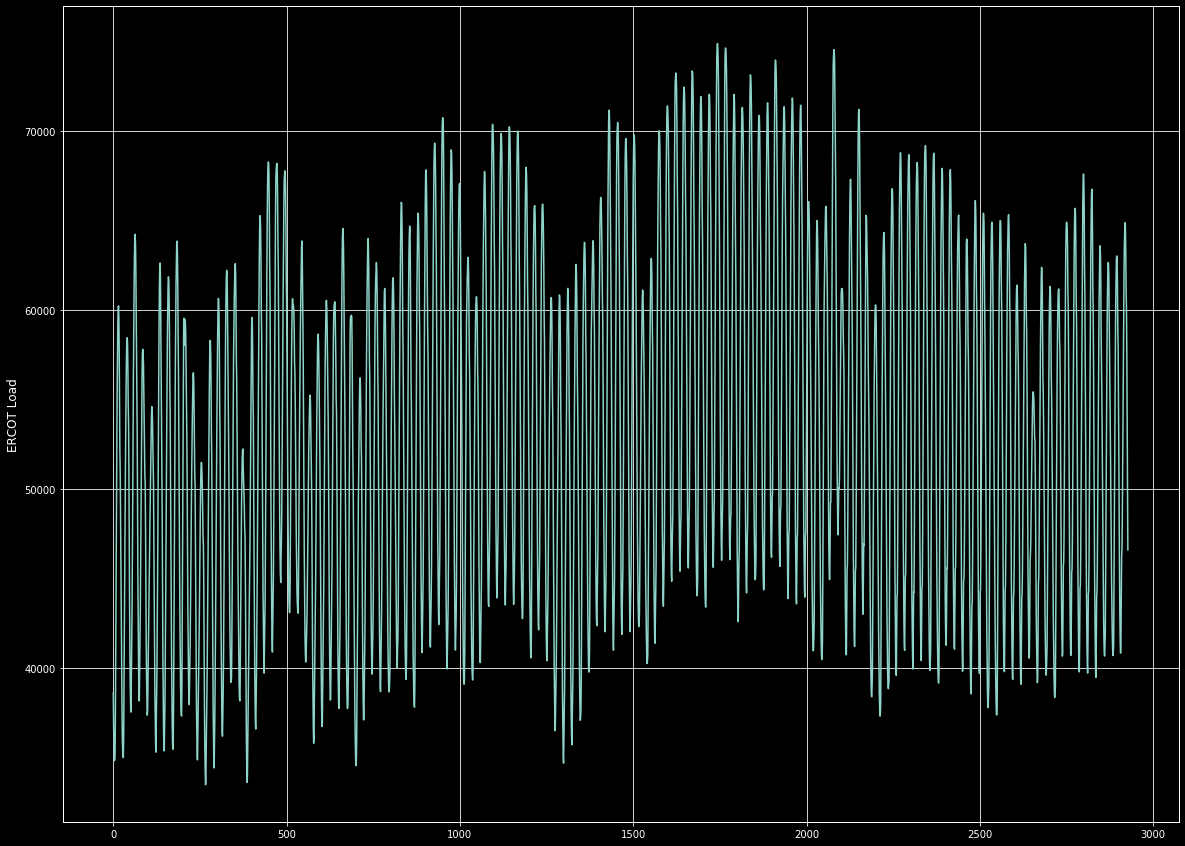

In [59]:
plt.plot(data["ERCOT (RTLOAD_FINAL)"])
plt.ylabel("ERCOT Load");

(-0.10977489683103422, 2.5928035051133186e-09)

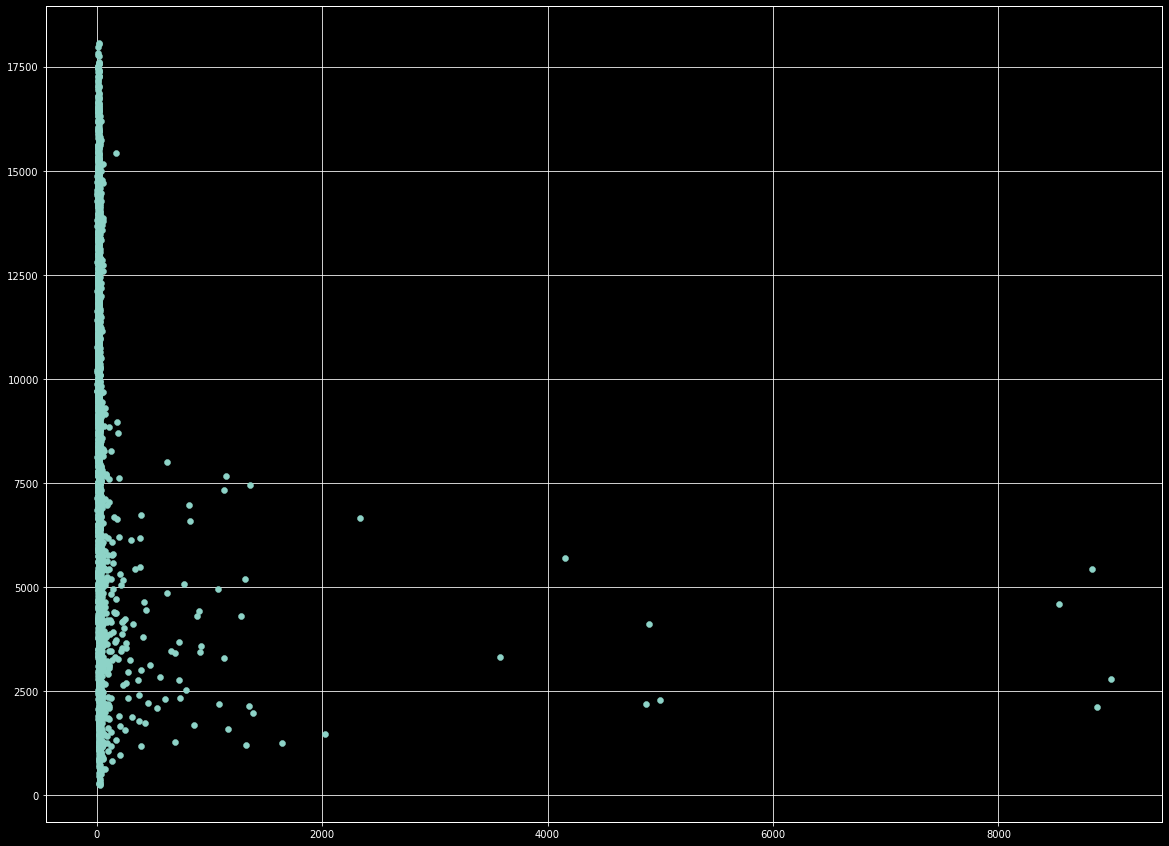

In [60]:
plt.scatter(data["HB_NORTH (RTLMP) "], data["ERCOT (WINDDATA)"])
scipy.stats.pearsonr(data["HB_NORTH (RTLMP) "], data["ERCOT (WINDDATA)"])




(-0.1145118597160257, 5.160136550961952e-10)

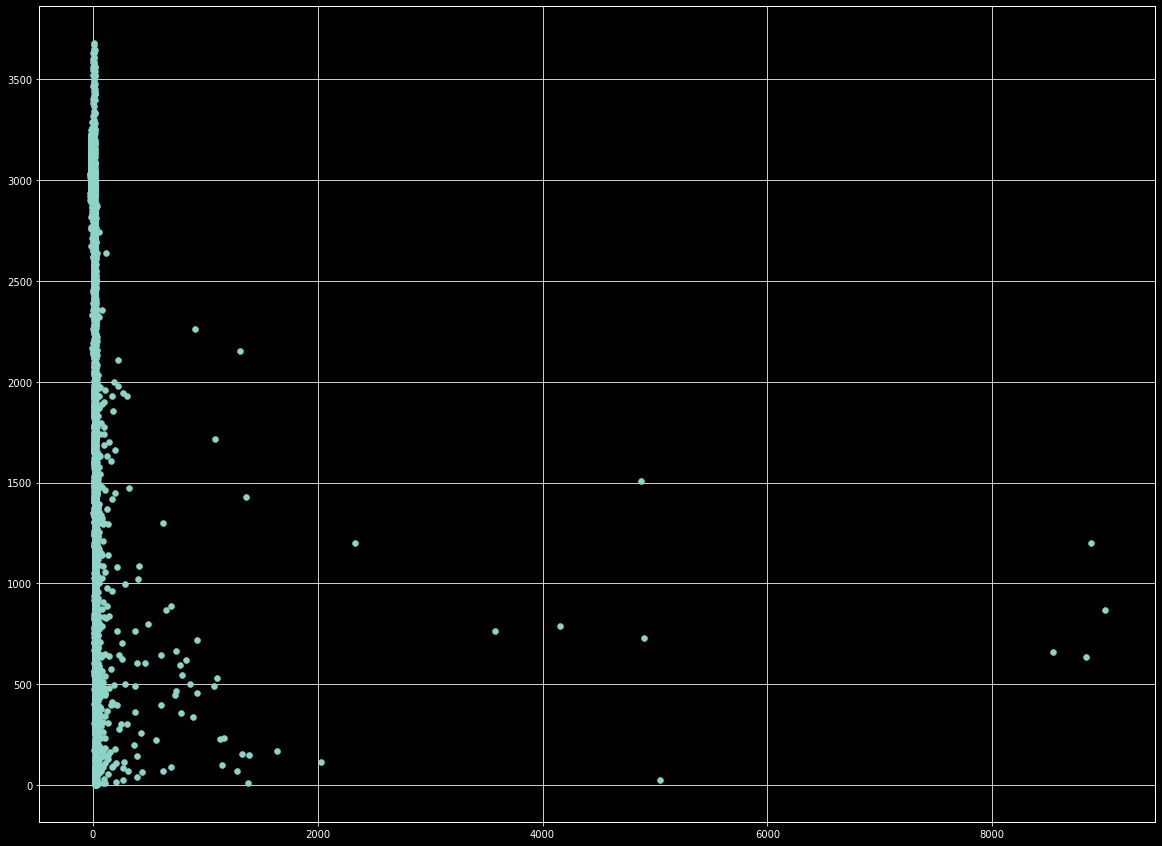

In [61]:
plt.scatter(data["PH1_UNIT1_2 (RTLMP) "], data["GR_PANHANDLE WIND"])
scipy.stats.pearsonr(data["PH1_UNIT1_2 (RTLMP) "], data["GR_PANHANDLE WIND"])

(-0.1145118597160257, 5.160136550961952e-10)

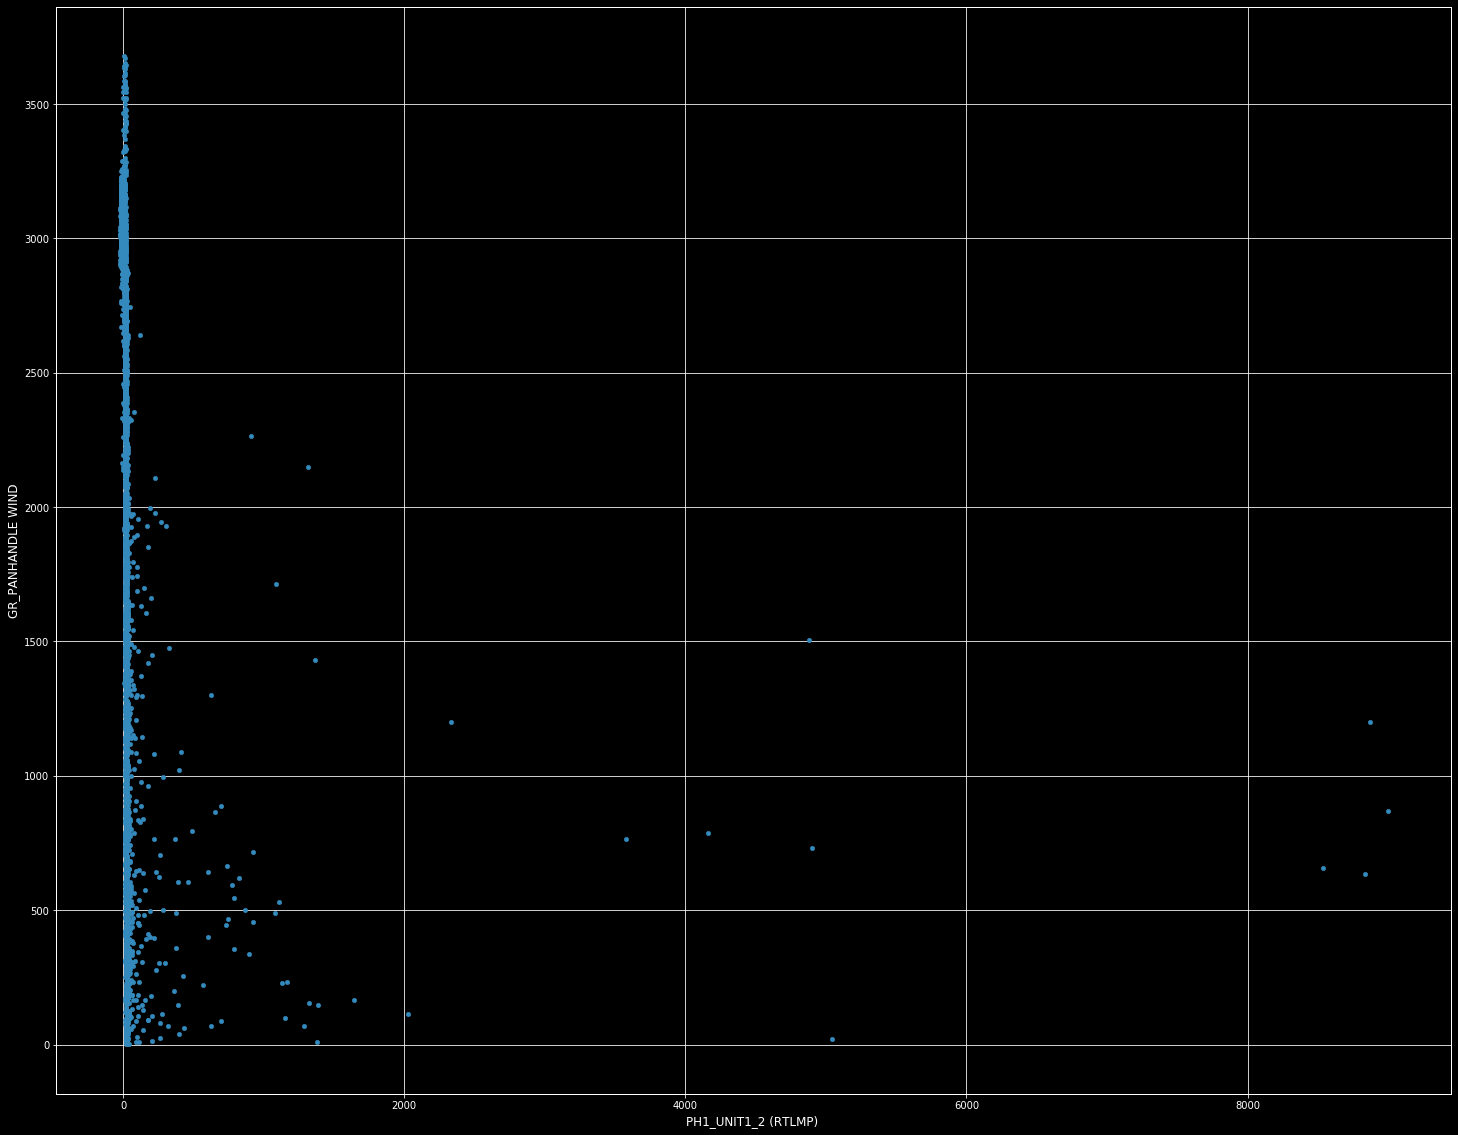

In [45]:
# this is using the plotting functionality in pandas, rather than matplotlib
data.plot(x="PH1_UNIT1_2 (RTLMP) ", y="GR_PANHANDLE WIND", kind="scatter")
scipy.stats.pearsonr(data["PH1_UNIT1_2 (RTLMP) "], data["GR_PANHANDLE WIND"])

(0.30169421637183047, 1.130135757939838e-62)

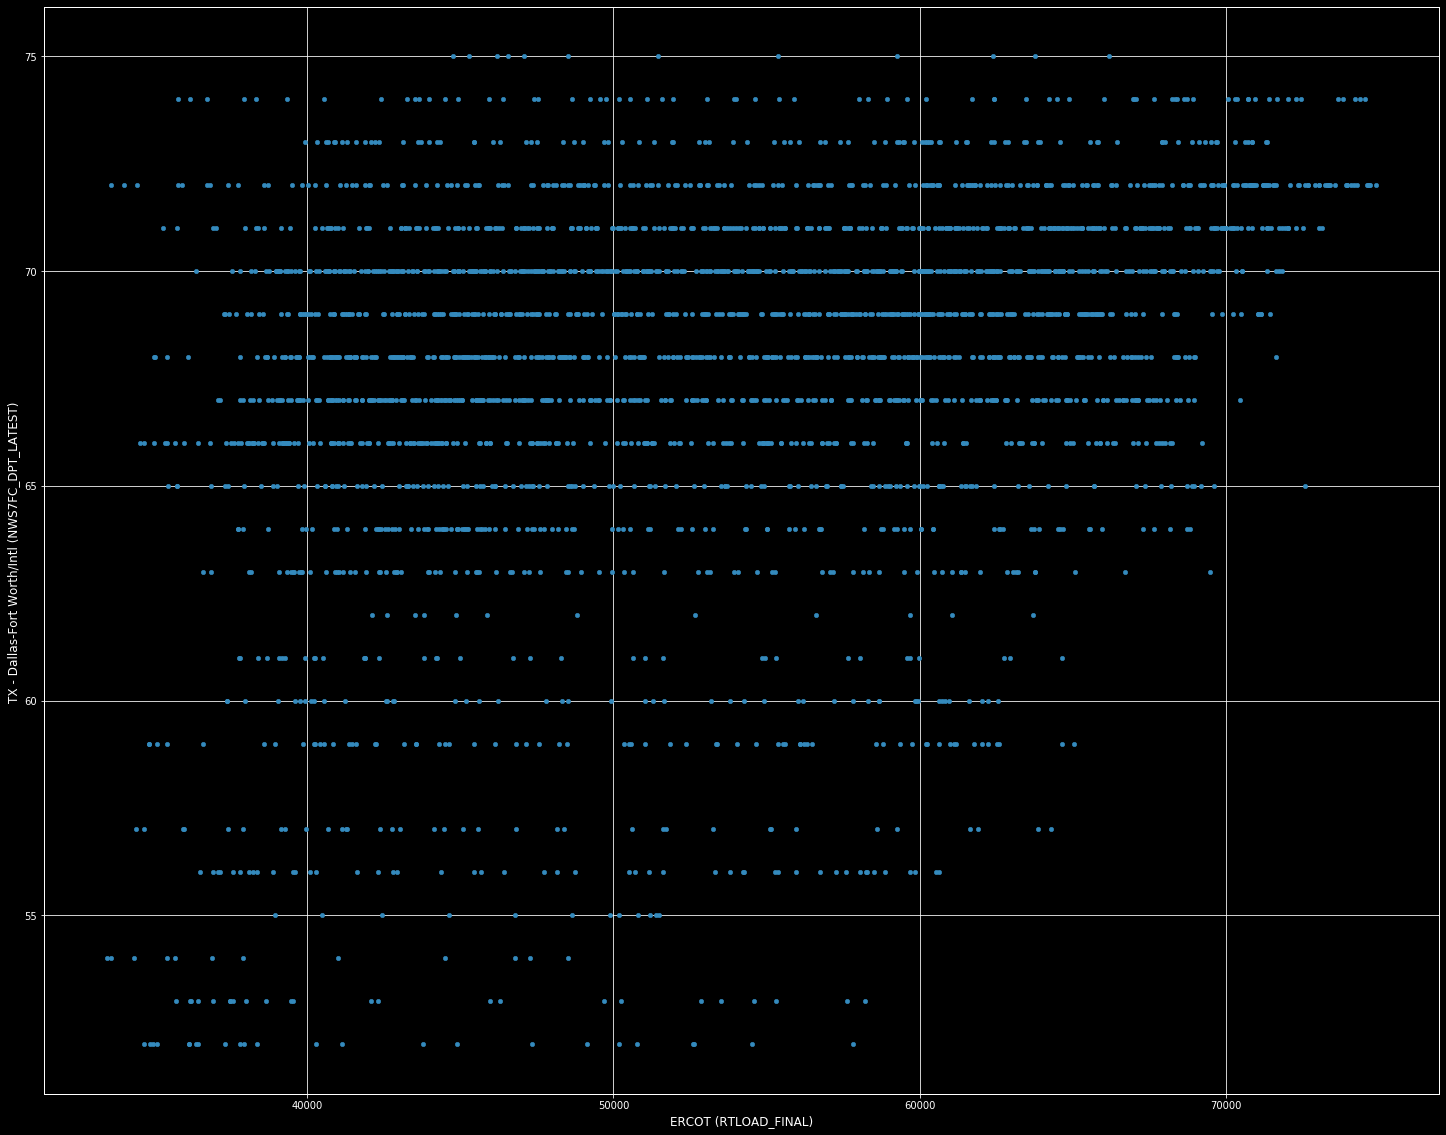

In [47]:
# ERCOT total load capacity and dewpoint scatter
data.plot(x="ERCOT (RTLOAD_FINAL)", y="TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST) ", kind="scatter")
scipy.stats.pearsonr(data["ERCOT (RTLOAD_FINAL)"], data["TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST) "])

(-0.23082973305113919, 1.0313836310868939e-36)

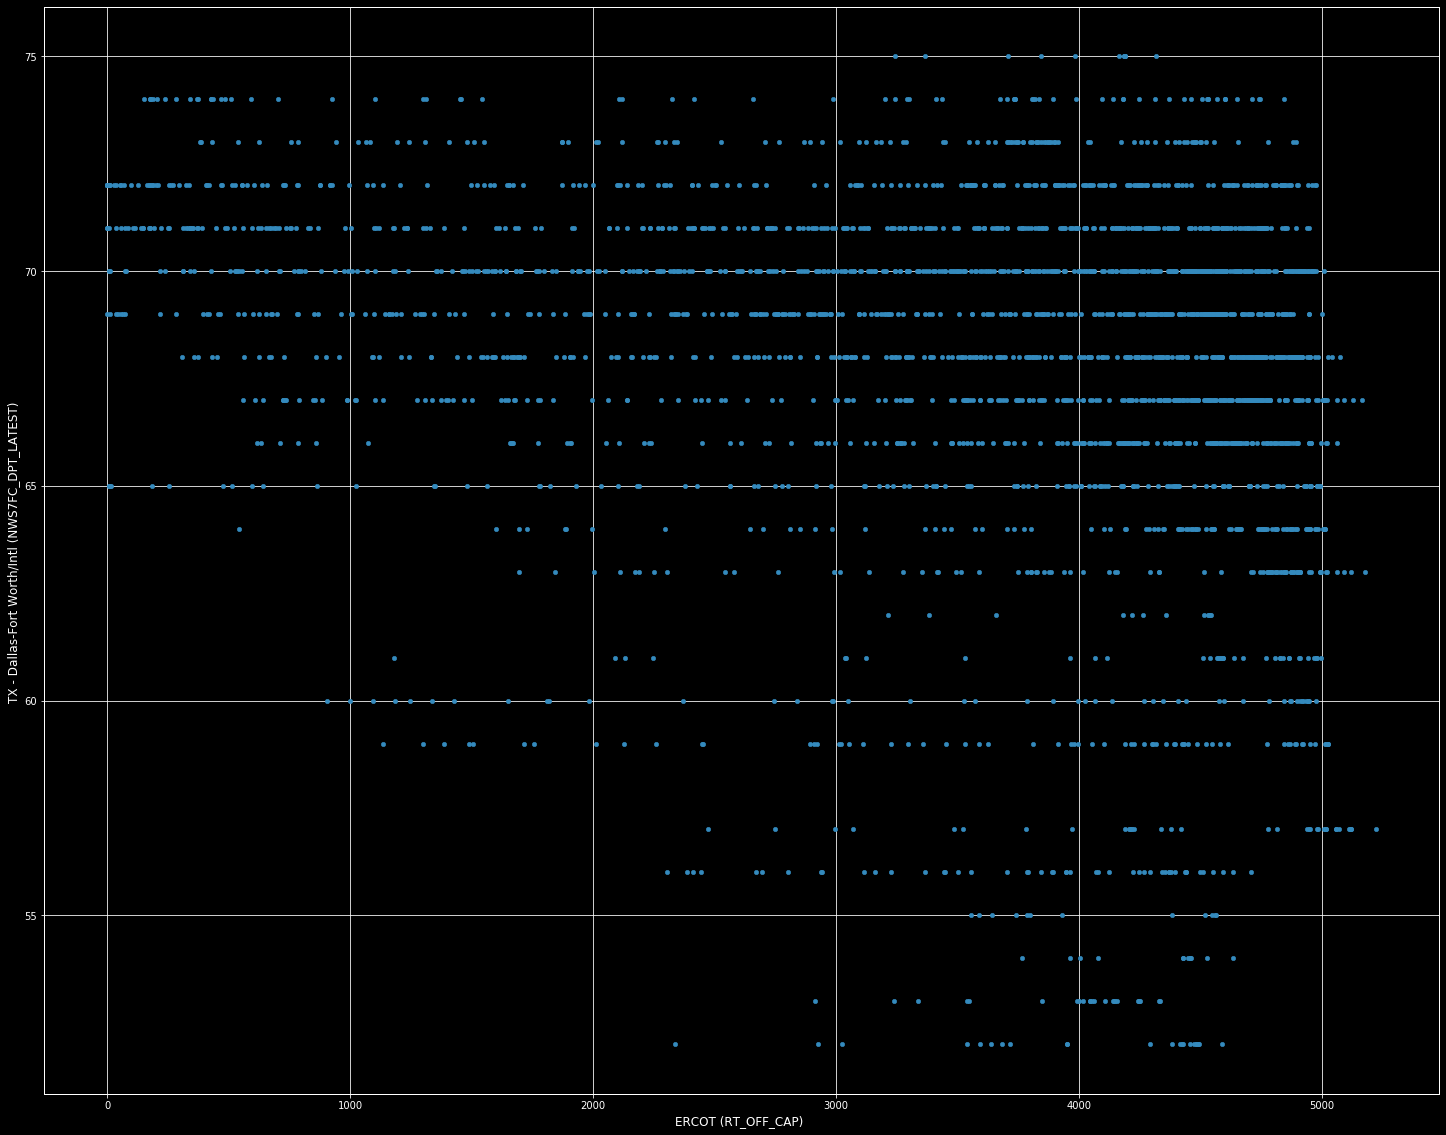

In [51]:
# off line capacity and dewpoint scatter
data.plot(x="ERCOT (RT_OFF_CAP) ", y="TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST) ", kind="scatter")
scipy.stats.pearsonr(data["ERCOT (RT_OFF_CAP) "], data["TX - Dallas-Fort Worth/Intl (NWS7FC_DPT_LATEST) "])

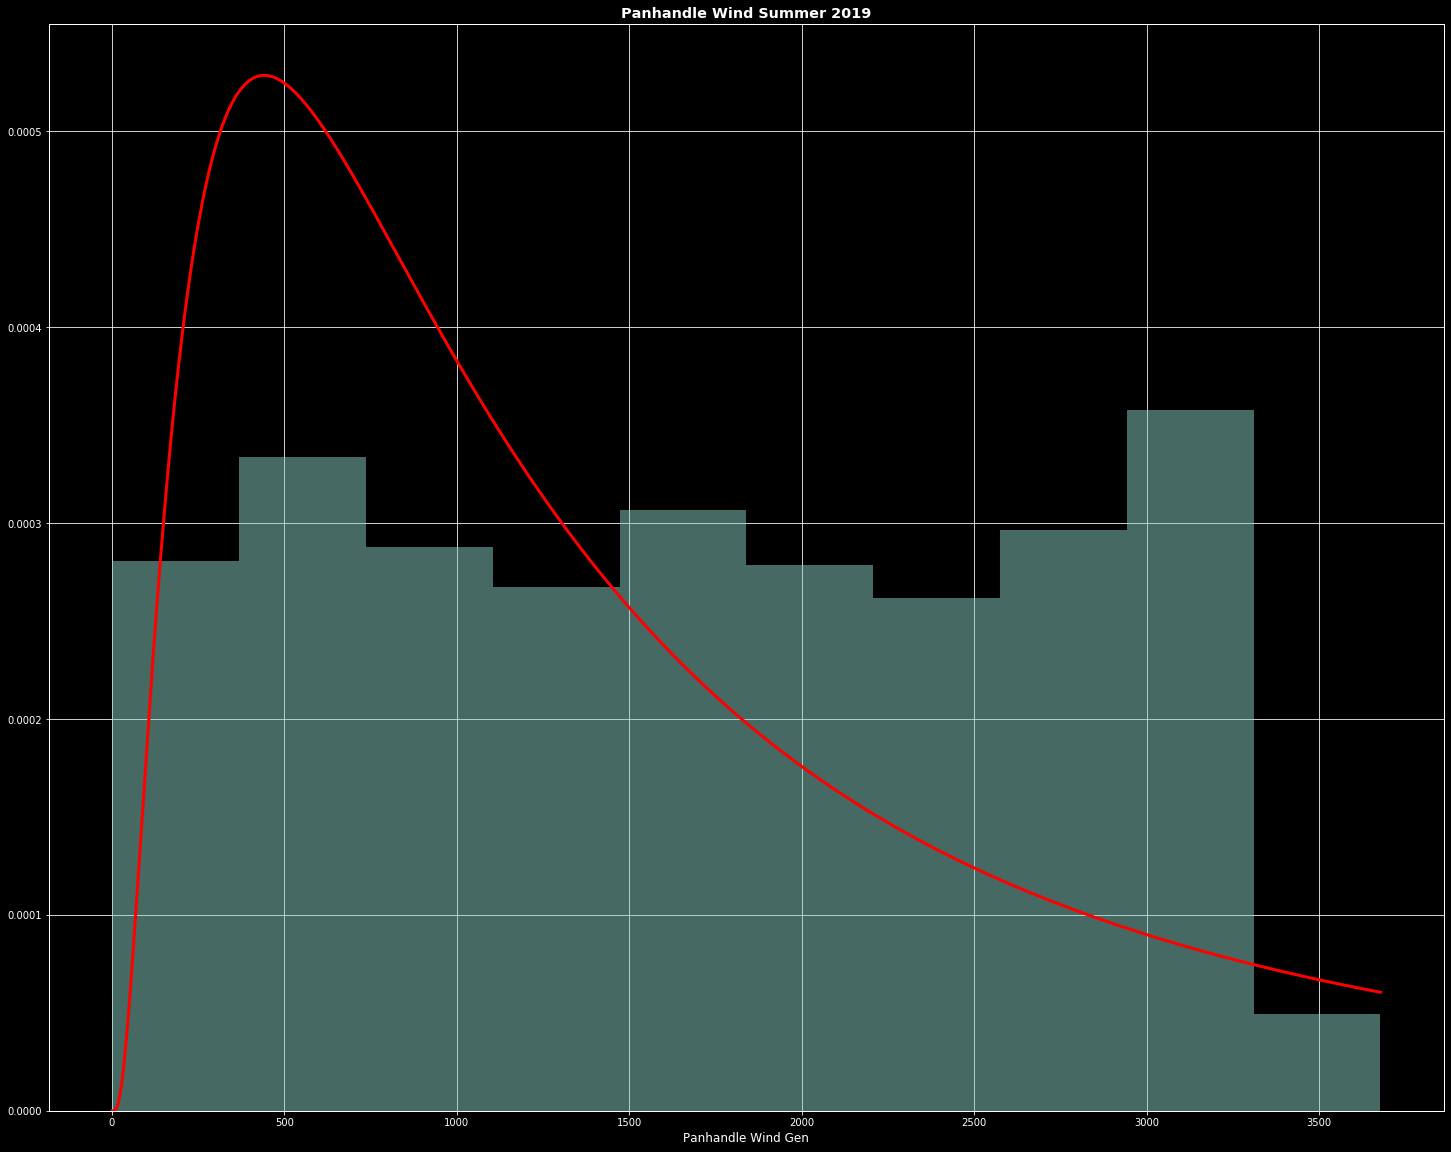

In [54]:
wind = data["GR_PANHANDLE WIND"]
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 4000)
plt.plot(support, scipy.stats.lognorm(shape,loc,scale).pdf(support), "r-", lw=3)
plt.title("Panhandle Wind Summer 2019", weight="bold")
plt.xlabel("Panhandle Wind Gen");

KstestResult(statistic=0.9980120564499597, pvalue=0.0)

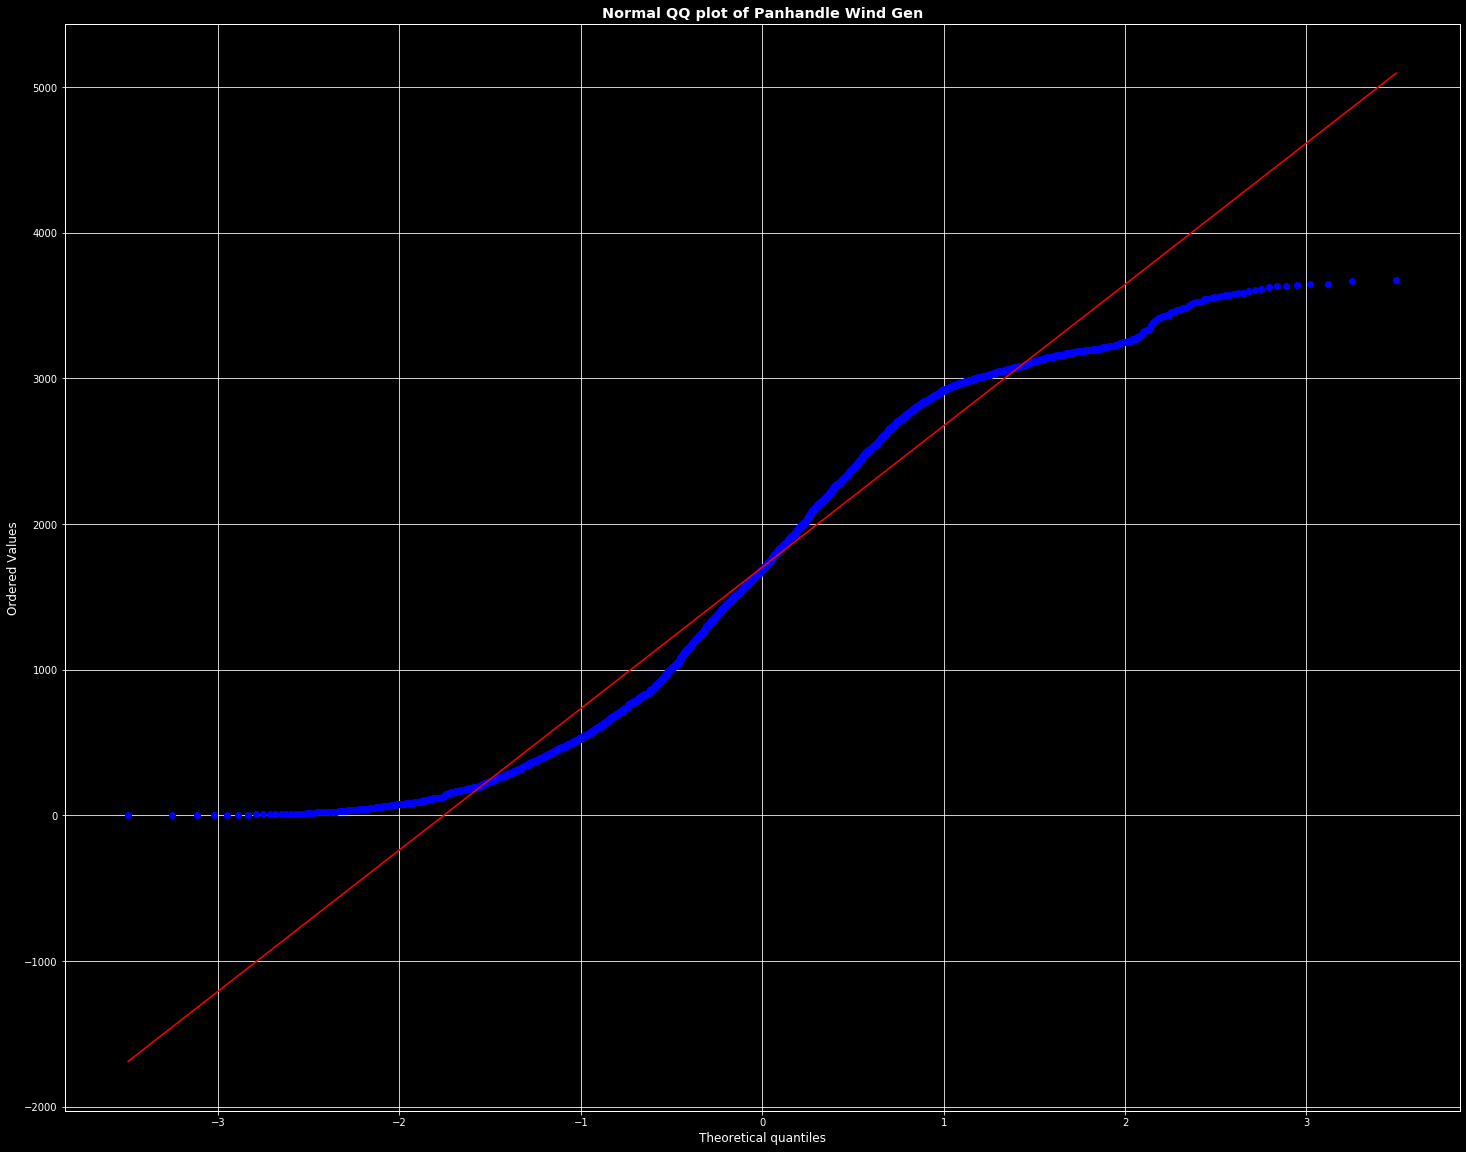

In [56]:
scipy.stats.probplot(wind, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ plot of Panhandle Wind Gen", weight="bold")
# also run a Kolmogorov-Smirnov test to measure goodness of fit
scipy.stats.kstest(wind, "norm")